<a href="https://colab.research.google.com/github/sBx99/support-vector-machines/blob/master/BreastCancerCellClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Breast Cancer Cell Classification

<img src="https://careresource.org/wp-content/uploads/2018/10/pink-ribbon-logo-png-transparent-719x899.png" height="100px" alt="pink sash">

## Import Libraries

In [1]:
# for basic mathematical functions on data 
import numpy as np
import pandas as pd

In [2]:
# for model
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
# for graphs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline

## Colour Palettes
1. Theme for Graphs
2. Theme for Heatmaps

In [4]:
%%html
<h4>Breast Cancer Awareness Month inspired palette</h4>
<iframe src="https://drive.google.com/file/d/1M5eFKLgFoIYzWQeN-OpbS5_UumkTpMSz/preview" width="700" height="70"></iframe>

In [5]:
# colour palette
# inspiration - https://coolors.co/ffffff-fff4fc-ffe9f9-fbddf2-f6d0eb-fbc5e0-ffb9d4-f199c1-ef7eac-ec6297

palette = sns.color_palette(['#EC6297', '#F6D0EB', '#FFB9D4', '#FFE9F9'])
# sns.set(font_scale=1)
sns.set_context("talk", font_scale=1)
sns.set_palette(palette)
sns.set_style('white',
              {'font.family': ['monospace'],
               'grid.color': '.5',
               'grid.linestyle': '--'})

In [6]:
# heatmap color dictionary
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#FFE9F9', '#F6D0EB', '#FFB9D4', '#F199C1', '#EC6297']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = colors.LinearSegmentedColormap('test', cdict)

## The Dataset

[Source - UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer)

In [7]:
cancer = datasets.load_breast_cancer()

In [8]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Dataset Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Dataset Description

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Features of Cancer Cells

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Targets

In [13]:
cancer.target_names # 0 - malignant, 1 - benign

array(['malignant', 'benign'], dtype='<U9')

In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
df.shape

(569, 31)

## Splitting Dataset into Training and Testing

- 70 - 30 split
- Random State set for result reproducibility

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

## Training + Hyperparameter Tuning


### Parameter Descriptions

1. **Kernel (kernel):** Linear, Polynomial and RBF

2. **Regularization (C):** Maintains regularization. C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the *trade-off* between decision boundary and misclassification term. *A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.*

3. **Gamma (gamma):** Maintains overfitting. A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. *A low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.*

### Cross-Validation

Cross validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. This technique is used to judge which parameters of the model would fit the given data in the best way possible. 

In [17]:
# default values - C=1, gamma='scale'
param_grid = [
  {'C': [0.5, 1, 10, 100],
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf']}
]

In [18]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=5
)

In [19]:
optimal_params.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    3.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=5,
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [20]:
# optimal parameters
optimal_params.best_params_

{'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}

In [21]:
# fit model with best parameters
optimizedClf = SVC(C=0.5, gamma=0.0001, kernel='rbf', random_state=1) # random state set so that result can be reproduced
optimizedClf.fit(X_train, y_train)

y_pred = optimizedClf.predict(X_test)

## Evaluating the Model's Performance

1. Confusion Matrix
2. Scores (Accuracy, Precision, Recall, F1)
3. Classification Report
4. Mean Square Error Percentage

In [22]:
def modelEval(y_test, y_pred, classifier):

  svm_cm = confusion_matrix(y_test, y_pred, [0, 1])

  sns.heatmap(svm_cm, xticklabels = ['malignant', 'benign'] , 
              yticklabels = ['malignant', 'benign'], cmap=cm, linewidths=0.75, fmt='0.0f', annot=True)
  plt.ylabel('true class')
  plt.xlabel('predicted class')
  plt.title('Support Vector Machine')
  plt.show()
  
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred)

  print('MODEL EVALUATION SCORE')
  print('-------------------------------------')
  print('accuracy score: ', accuracy * 100, '%')
  print('-------------------------------------')
  print('precision score: ', precision * 100, '%')
  print('-------------------------------------')
  print('recall score: ', recall * 100, '%')
  print('-------------------------------------')
  print('f1 score: ', f1score * 100, '%')
  print('-------------------------------------')
  print('\nclassification report: \n',
        classification_report(y_test, y_pred))

  print('mean square error percentage is: ', mean_squared_error(y_test, y_pred)*100, '%')

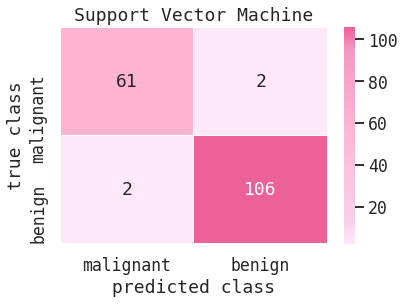

MODEL EVALUATION SCORE
-------------------------------------
accuracy score:  97.6608187134503 %
-------------------------------------
precision score:  98.14814814814815 %
-------------------------------------
recall score:  98.14814814814815 %
-------------------------------------
f1 score:  98.14814814814815 %
-------------------------------------

classification report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

mean square error percentage is:  2.3391812865497075 %


In [23]:
modelEval(y_test, y_pred, optimizedClf) # performance of optimized classifier

## Applying PCA to find the Decision Boundary

This is to fit the data points and find the decision boundary for the final Support Vector Machine with RBF Kernel

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
# by default, PCA centers the data, but it doesn't scale it

In [25]:
# use the mean and standard deviation from the training dataset to center and scale the testing data
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
# scaler.mean_
# scaler.scale_ 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

In [28]:
# optimizing SVM to fit PC1 and PC2
train_pc1_coords = X_train_pca[:, 0] # X-coords of data after PCA
train_pc2_coords = X_train_pca[:, 1] # Y-coords of data after PCA

# center and scale principal components
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

In [29]:
optimizedPcaClf = SVC(random_state=42, C=1000, gamma=0.001, kernel='rbf')
optimizedPcaClf.fit(pca_train_scaled, y_train)

# transform test dataset with PCA
X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

In [30]:
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(
    np.arange(start=x_min, stop=x_max, step=0.1),
    np.arange(start=y_min, stop=y_max, step=0.1)
)

In [31]:
Z = optimizedPcaClf.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

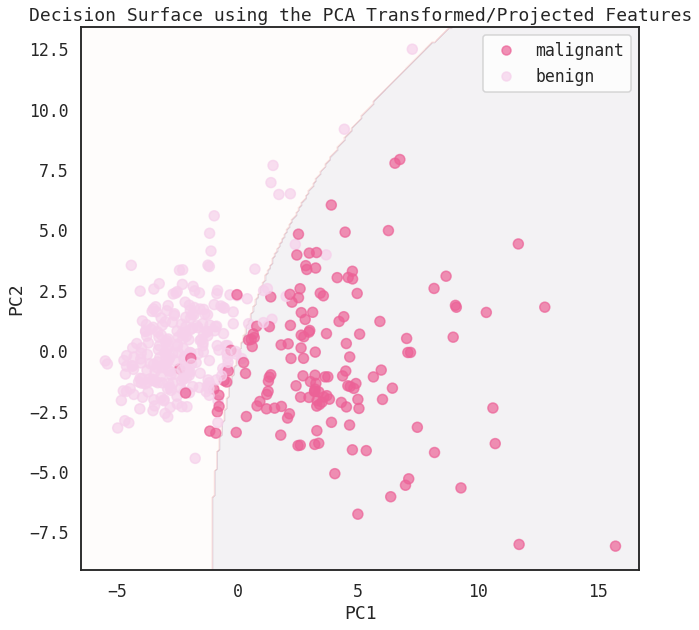

In [32]:
# contour plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, alpha=0.05) # ax.contourf(xx, yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#EC6297', '#F6D0EB'])
scatter = ax.scatter(
    test_pc1_coords,
    test_pc2_coords,
    c=y_train,
    cmap=cmap,
    s=100,
    # edgecolors='k',
    alpha=0.7)
legend = ax.legend(
    scatter.legend_elements()[0],
    scatter.legend_elements()[1],
    loc='upper right')
legend.get_texts()[0].set_text('malignant')
legend.get_texts()[1].set_text('benign')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Decision Surface using the PCA Transformed/Projected Features')
plt.show()